# Введение в машинное обучение

## Семинар #5

### Екатерина Кондратьева

ekaterina.kondrateva@skoltech.ru

## Деревья решений (Decision Trees). Случайный лес (Random Forest)

## 1. Деревья решений (Decision Trees)

Дерево принятия решений (также может называться деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.  

Источники:
1. Лекция https://ru.coursera.org/lecture/supervised-learning/rieshaiushchiie-dieriev-ia-HZxD1 
2. https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
3. https://habr.com/ru/post/171759/
4. https://www.hse.ru/mirror/pubs/share/215285956

In [18]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp

#sklearn everything that can be needed
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.linear_model import LogisticRegression    
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR

#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

### Recap прошлого занятия: классификация на выборке ирисов kNN

In [19]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


## Отрисовка решающего правила на KNN 

In [23]:
clf = KNeighborsClassifier()# почему у алгоритма нет random state?
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


In [26]:
clf = DecisionTreeClassifier(random_state = 0) # (random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


### О чем говорит такая разность точности при изменение random_seeed?

Размерность данных, датасет  "Ирисы":  (150, 2)
Размерность данных, уменьшенная до двух характеристик лдя отрисовки:  (150, 2)


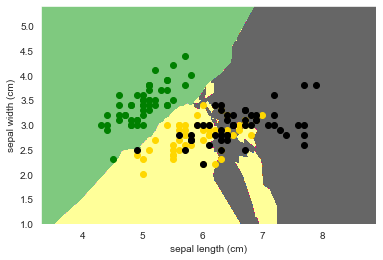

In [25]:
pair=[0, 1]
print ('Размерность данных, датасет  "Ирисы": ', X.shape)
X = iris.data[:, [0, 1]]
y = iris.target
print ('Размерность данных, уменьшенная до двух характеристик лдя отрисовки: ', X.shape)

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = KNeighborsClassifier(n_neighbors=10).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired);

#### Посмотрим, как строит решающее правило Дерево Решений:

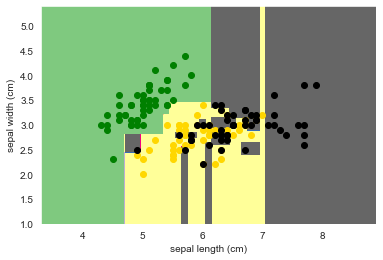

In [6]:
pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = DecisionTreeClassifier(random_state=42).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])


for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired);

In [27]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Деревья решений можно визуализировать:

Пример классификации данного датасета
    
!['деревьеярешений'](https://scikit-learn.org/stable/_images/iris.png)

### Как переобучиться на Деревьях Решений?

#### Посчитаем `baseline` на ЛогРегрессии и сравним с результатом на деревьях

Далее в коде закомментирована рисовалка решающего правила для деревьев решений. Если у вас она не ставится с первого раза - оставьте попытки, она не пригодится дальше нигде.

In [31]:
clf = LogisticRegression().fit(X_train, y_train)  # будем работать с первоначальным разбиением на train и test
print(clf.score(X_test, y_test))

0.9111111111111111


In [37]:
clf = DecisionTreeClassifier( random_state = 42).fit(X_train, y_train)  # min_samples_split --?

print(clf.score(X_test, y_test))

0.9333333333333333


In [36]:
clf = DecisionTreeClassifier(min_samples_leaf = 10, min_samples_split = 5, random_state = 42).fit(X, y)

print(clf.score(X_test, y_test))

0.8888888888888888


Посмотрим на справку функции в `sklearn`:

Выбор критерия:
    http://www.machinelearning.ru/wiki/images/8/89/Sem3_trees.pdf

## Регрессия на Деревьях Решений:

#### Если при классификации в листах стоят результирующие классы, при регрессии же стоит какое-то значение целевой функции.

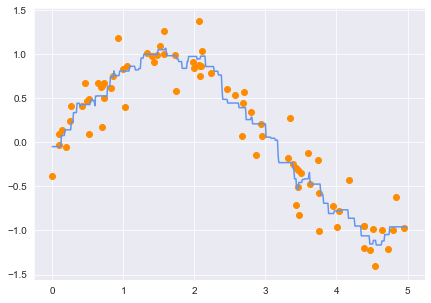

In [47]:
# Recap KNN 
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = KNeighborsRegressor(n_neighbors = 5, 
                         ).fit(X, y)
y_rfc = clf.predict(X_test)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_rfc , c='cornflowerblue', label='prediction');

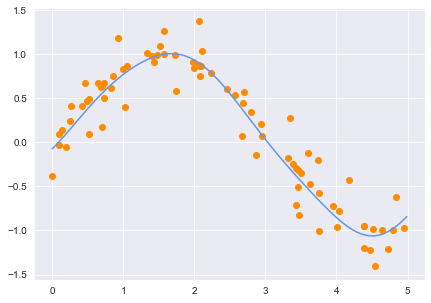

In [48]:
from sklearn.svm import SVR

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = SVR().fit(X, y)
y_svr = clf.predict(X_test)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_svr, c='cornflowerblue', label='prediction');

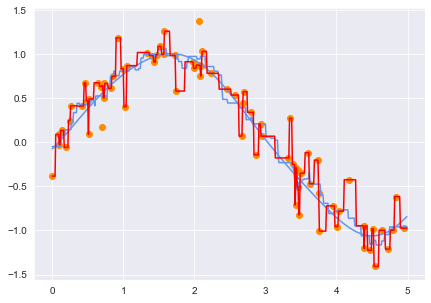

In [50]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = DecisionTreeRegressor().fit(X, y)
y_dtc = clf.predict(X_test)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_svr, c='cornflowerblue', label='prediction');
plt.plot(X_test, y_rfc , c='cornflowerblue', label='prediction');
plt.plot(X_test, y_dtc, c='red', label='prediction');

### Что можно сказать по отрисовке функции решающим деревом?

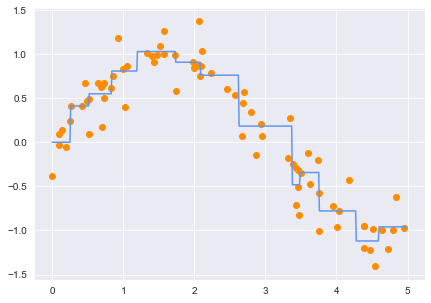

In [52]:
clf = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5).fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

В каких из этих трех случаев модель переобучилась? Почему?

Почему не воспроизводится результат DTC на дефолтных параметрах?

# 2. Леса решений: Random Forest Classification (Regression)

In [53]:
from sklearn.datasets import load_wine
wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,test_size=0.3, stratify=wine.target, random_state=42)

In [54]:
y_train

array([0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1,
       1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1])

In [55]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [56]:
wine.data.shape

(178, 13)

In [57]:
log_reg = LogisticRegression(random_state=42) 
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.976
Accuracy on the test set: 0.981


In [58]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.963


In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state = 42, warm_start=True) 
rfc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(rfc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.963


### Получилось 3 модели, причем точность на деревьях решений - 1.000. Т.е. лучший результат на выборке принадлежит RFC классификатору.

In [60]:
# посмотрим на выбранные характеристики модели
rfc.feature_importances_

array([0.13904712, 0.0257427 , 0.01384931, 0.00233003, 0.10582456,
       0.04661781, 0.27048422, 0.00524149, 0.01826678, 0.09521495,
       0.14404948, 0.07737182, 0.05595971])

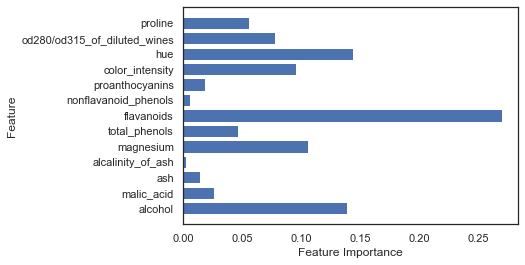

In [81]:
#Feature Importance
n_feature = wine.data.shape[1]
plt.barh(range(n_feature), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), wine.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
#plt.ylim(1)
#plt.xlim(0.5)
plt.show()

### Что значат `feature_importances` в случае деревьев решений?

В scikit-learn реализована `feature_importance` по Брейман, Фридман, "Деревья классификации и регрессии", 1984 год. Его иногда называют "существенным значением" или "средним уменьшением примеси". Каждый узел в деревьях решений является условием для отдельного объекта, предназначенного для разделения набора данных на два, так чтобы аналогичные значения ответов оказались в одном наборе. Мера, на основе которой выбирается (локально) оптимальное условие, называется примесью (`impurity`). 

Для классификации это, как правило, примесь Джини или получение / энтропия информации, а для деревьев регрессии - дисперсия. Таким образом, при обучении дерева можно вычислить, насколько каждая особенность уменьшает взвешенную примесь в дереве. Для леса уменьшение примесей от каждой характеристики может быть усреднено, и ранжировано в соответствии с этим показателем.

In [80]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Однако, как получить инерпретируемую оценку этой значимости?

In [90]:
rfc.feature_importances_

array([0.13904712, 0.0257427 , 0.01384931, 0.00233003, 0.10582456,
       0.04661781, 0.27048422, 0.00524149, 0.01826678, 0.09521495,
       0.14404948, 0.07737182, 0.05595971])

In [107]:
# создадим новый датафрейм, чтобы с этими характеристиками было удобнее работать
data = pd.DataFrame(data = wine.data, columns =  wine.feature_names)

#### Старый добрый корреляционный анализ:

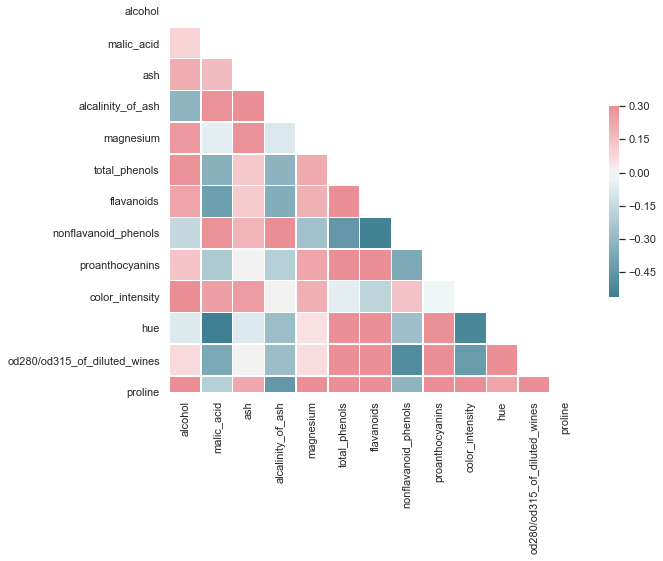

In [106]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [101]:
import scipy

scipy.stats.pearsonr(data['alcohol'], wine.target)

(-0.32822194089001927, 7.723253314615735e-06)

### Выбор характеристик в датасете можно реализовать через SelectkBest

In [72]:
from sklearn.feature_selection import SelectKBest

##### По дефолту он скорит функцией `f_classif` - или ANOVA https://en.wikipedia.org/wiki/Analysis_of_variance

In [114]:
skb = SelectKBest(k = 5)

X = skb.fit_transform(wine.data, wine.target)

In [115]:
X.shape

(178, 5)

In [121]:
skb.scores_ # скоры каждой фичи по F-статистике

array([135.07762424,  36.94342496,  13.3129012 ,  35.77163741,
        12.42958434,  93.73300962, 233.92587268,  27.57541715,
        30.27138317, 120.66401844, 101.31679539, 189.97232058,
       207.9203739 ])

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.target, test_size=0.3, random_state=42, stratify=wine.target)

In [134]:
rfc = RandomForestClassifier(random_state=42) 
rfc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(rfc.score(X_test,y_test)))

Accuracy on the training set: 0.992
Accuracy on the test set: 0.963


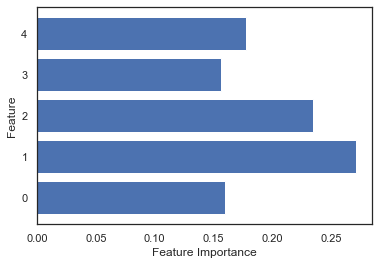

In [136]:
#Feature Importance
n_feature = X_train.shape[1]
plt.barh(range(n_feature), rfc.feature_importances_, align='center')
#plt.yticks(np.arange(n_feature), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

#### Далее можно опять посчитать корреляции по выбранным характеристикам, чтобы их интерпретировать.

###   Сравним точности двух классификаторов

In [137]:
from sklearn.model_selection import KFold

In [143]:
i = 0
list_ = []
kfold = KFold(n_splits = 10, random_state= 42)
X = wine.data
y = wine.target

dtc = DecisionTreeClassifier()
for train_index, test_index in kfold.split(X_train, y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold #', i)
    i+=1
    dtc.fit(X_train,y_train)
    list_.append(dtc.score(X_test,y_test))
    print(dtc.score(X_test,y_test))    

Fold # 0
1.0
Fold # 1
0.8125
Fold # 2
0.9375
Fold # 3
0.8125
Fold # 4
0.75
Fold # 5
0.9375
Fold # 6
1.0
Fold # 7
0.75
Fold # 8
0.1875
Fold # 9
0.875


In [144]:
i = 0
list_1 = []
dtc = RandomForestClassifier()
for train_index, test_index in kfold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold #', i)
    i+=1
    dtc.fit(X_train,y_train)
    list_1.append(dtc.score(X_test,y_test))
    print(dtc.score(X_test,y_test))   

Fold # 0
1.0
Fold # 1
0.7777777777777778
Fold # 2
1.0
Fold # 3
0.8888888888888888
Fold # 4
0.8333333333333334
Fold # 5
1.0
Fold # 6
0.9444444444444444
Fold # 7
0.7222222222222222
Fold # 8
1.0
Fold # 9
1.0


In [145]:
np.mean(list_), np.std(list_)

(0.80625, 0.22439153838770304)

In [146]:
np.mean(list_1), np.std(list_1)

(0.9166666666666666, 0.10015420209622192)

In [147]:
import scipy

scipy.stats.ttest_rel(list_1,list_)

Ttest_relResult(statistic=1.3760117912890781, pvalue=0.20208697482025423)

#### Вопрос: побил ли Лес Решений результаты Дерева решений?

### Задача 1.  
Сравнить решающее правило на Деревьях Решений и Случайных Лесов Решений для регрессионной задачи на выборке `sklearn.datasets.diabets`

In [161]:
# Визуализации Линейной Регрессии по одному признаку
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [162]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

In [163]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [164]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [165]:
X_train.shape, X_test.shape

((309, 10), (133, 10))

In [166]:
y_test.max(), y_test.min()

(310.0, 37.0)

In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
y_train = scaler.fit_transform(pd.DataFrame(y_train))
y_test = scaler.transform(pd.DataFrame(y_test))

In [169]:
# non sclaed
from sklearn.tree import DecisionTreeRegressor

dtc = DecisionTreeRegressor(random_state=42) 
dtc.fit( X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: -0.103


In [170]:
dtc.score(X_test,y_test)

-0.10304408181633183

In [172]:
# non scaled
from sklearn.ensemble import RandomForestRegressor

dtc = RandomForestRegressor(n_estimators=100, random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 0.918
Accuracy on the test set: 0.470


##  Вопросы для самопроверки:

1. В чем отличие Decision Trees от Random Forest?
2. На что влияют критерии построения решающего правила в деревьях?
3. Как интерпретировать результат модели RFC?
4. Почему  важно варьировать `max_depth` дерева?

## Выводы:

1. Дерево – интерпретируемый алгоритм (пока оно не очень глубокое). Random Forest – не интерпретируемый алгоритм
1. Параметр глубины дерева max_depth нужно находить исходя из компромисс между underfitting и overfitting! Можно переобучиться и на тестовом датасете
4. Random Forest борется с изъянами Decision Tree путем построения большого количества разных деревьев и их коллективного голосования.
2. Построение дерева DTC и качество модели сильно зависит от того, удачно ли были выбраны сплиты в начале построения!  
3. Стандартной реализации для задачи регрессии вам доступны критерии gini, entropy 
5. Качество Random Forest неубывает с увеличением деревьев (не происходит переобучения)

## Задача 2. 
Мы уже знаем 4 принципаильно разных классификатора: LR, KNN, SVC, RFC. 
Сравнить их точности предсказания на датасете `breast cancer`. Использовать классификаторы с натройками по умолчанию. Разбить данные на `train`  и  `test`.

In [173]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

random_state  = 42

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [193]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.svm import SVC
svc= SVC(kernel = 'linear')

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [194]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

random_state = 42
models = [knn, svc, rfc, lr]

for model in models:
    model.fit(X_train,y_train)# fit the model
    predictions = model.predict(X_test)
    print(str(model)[:10], accuracy_score(y_test, predictions))   

KNeighbors 0.9707602339181286
SVC(C=1.0, 0.9766081871345029
RandomFore 0.9649122807017544
LogisticRe 0.9766081871345029


#### Исследуем лучшую модель:

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
pipe = Pipeline([('standardizer', scaler), ('svc', svc)])


# Create space of candidate values
search_space = [{'svc__C': [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'svc__kernel': ['linear', 'rbf','poly']}]
# Create grid search 

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_train, y_train)

In [178]:
clf.best_estimator_.score(X_test, y_test)

0.9766081871345029

#### Посомтреть результаты поиска по гиперапараметрам:

Вопрос: какая модель называется лучшей (по каким критериям)?

In [179]:
clf.cv_results_

{'mean_fit_time': array([0.00417137, 0.00668368, 0.0071279 , 0.00440931, 0.00714569,
        0.00637054, 0.00419049, 0.0059906 , 0.00558829, 0.00478673,
        0.00580812, 0.00596194, 0.0051825 , 0.00579491, 0.00518751,
        0.00558534, 0.00767241, 0.00498672, 0.00559168, 0.00578156,
        0.00498514, 0.00592713, 0.00516214, 0.00500817, 0.00717974,
        0.00578551, 0.004949  , 0.00697875, 0.00558558, 0.00478611,
        0.00697947, 0.00578012, 0.00518417, 0.00697179, 0.00557632,
        0.0049686 , 0.00651894, 0.00519629, 0.00499511]),
 'std_fit_time': array([4.08669948e-04, 7.45314822e-04, 7.96823978e-04, 4.58172849e-04,
        4.45275798e-04, 4.90992463e-04, 3.97314312e-04, 3.47216697e-05,
        4.90001191e-04, 7.42815327e-04, 4.09313028e-04, 4.83154883e-05,
        3.99368613e-04, 4.05846260e-04, 3.98518235e-04, 4.87468241e-04,
        3.89485147e-03, 2.20276059e-06, 4.81000780e-04, 3.98826856e-04,
        1.44159474e-06, 5.28966646e-04, 3.49809592e-04, 4.63355698e-05,
 

In [180]:
clf.best_estimator_

Pipeline(memory=None,
         steps=[('standardizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [198]:
clf.best_estimator_.named_steps['svc'].coef_[0]

array([-0.26201082, -0.22287287, -0.2378374 , -0.28905777, -0.01541941,
        0.27647112, -0.36496697, -0.51536565, -0.00876694,  0.09478219,
       -0.5292137 ,  0.115907  , -0.38125249, -0.39128305, -0.06331044,
        0.22286227, -0.08816704, -0.21634629,  0.2081491 ,  0.34617964,
       -0.26925491, -0.59516184, -0.20146133, -0.28104051, -0.28751544,
        0.14348316, -0.4151432 , -0.29063285, -0.53238992, -0.10738949])

## Задача 3 (Домашнее задание).

Построить `feature importances` для каждого классифкатора, посмотреть, какие признаки учавствуют в построении решающего правила

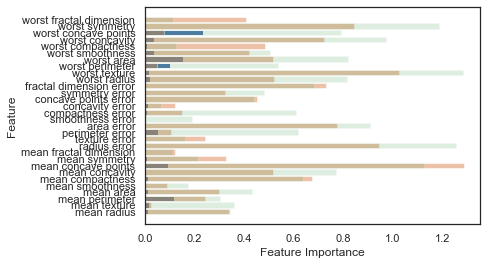

In [206]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), rfc.feature_importances_, align='center')
plt.barh(range(n_feature), abs(svc.coef_[0]), align='center', alpha = 0.5)
plt.barh(range(n_feature), abs(lr.coef_[0]), align='center', alpha = 0.2)
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### А что потом?


1. На каких пациентах ошибаются классификаторы?
2. Вывести все параметры пациентов, сравнить со средними значениями по выборке
3. Сравнить с `feature_importance`